### [D0828 과제]
- 데이터 셋 : auto-mpg.csv
- 목적 : 연비 예측
- 학습방법 : 지도학습 > 회귀
- 알고리즘 : LinearRegression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_name = r'C:\VSCode\KDT\머신러닝\DAY03\auto_mpg.csv'
auto_df = pd.read_csv(file_name)
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [3]:
auto_corr = auto_df.corr(numeric_only=True)

<Axes: >

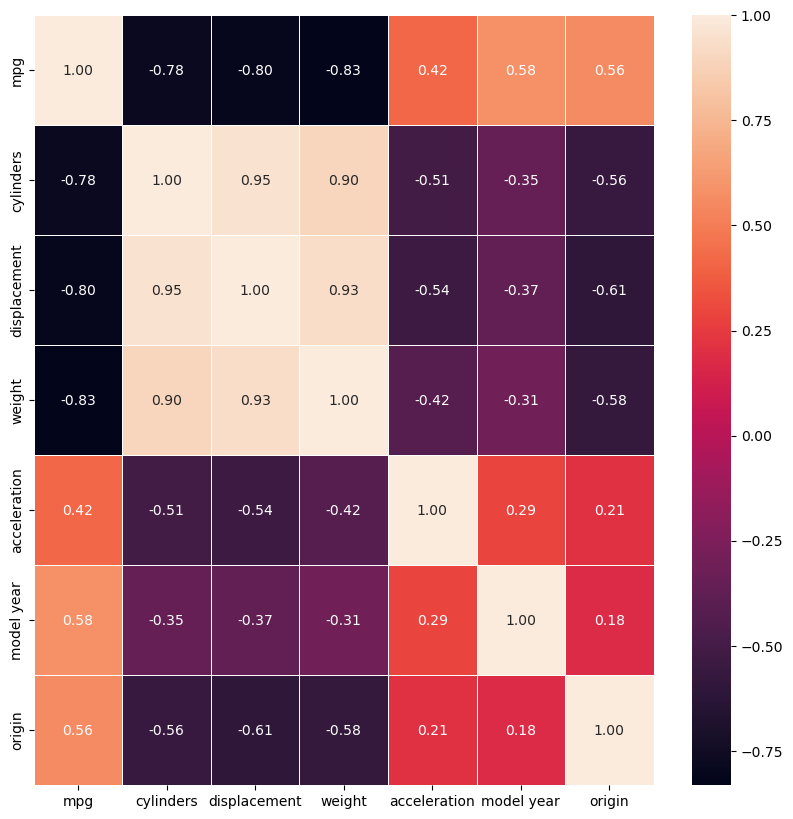

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(auto_corr,linewidths=0.5,fmt='.2f',annot=True)
# weight, displacement, cylinders이 mpg와 관계가 높은데 변수들끼리 상관관계가 높으므로 가장 높은 weight를 피쳐로 선택

In [5]:
# 피쳐 데이터 뽑기(2차원)
features = auto_df['weight'].to_frame()
features

,weight
0,3504
1,3693
2,3436
3,3433
4,3449
...,...
393,2790
394,2130
395,2295
396,2625


In [6]:
# 타겟 데이터 뽑기(1차원)
target = auto_df['mpg']
target

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

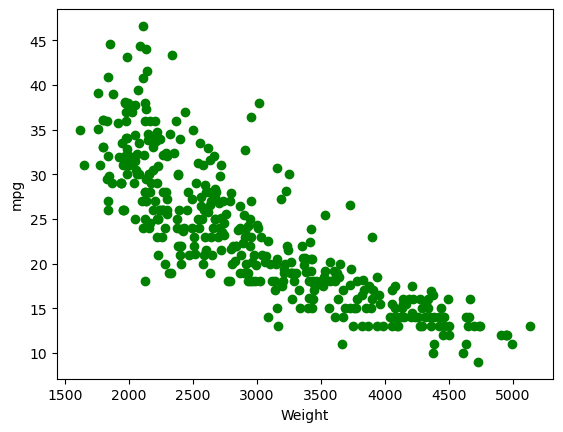

In [7]:
# 데이터 분포 확인
### 현재 데이터의 분포 확인
plt.plot(features,target,'go')
plt.xlabel('Weight')
plt.ylabel('mpg')
plt.show()

# => 선형 관계 데이터 확인 : 선형회귀에 쓰는 LineRegression 

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.3,
                                                    random_state=5)

In [10]:
print(f'X_train : {X_train.shape},{X_train.ndim}D')
print(f'y_train : {y_train.shape},{y_train.ndim}D')

print(f'X_test : {X_test.shape},{X_test.ndim}D')
print(f'y_test : {y_test.shape},{y_test.ndim}D')

X_train : (278, 1),2D
y_train : (278,),1D
X_test : (120, 1),2D
y_test : (120,),1D


In [11]:
# 인덱스 초기화 해주기.
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)

X_test=X_test.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

In [12]:
# 학습 모델 인스턴스 생성
model = LinearRegression()

In [13]:
# 학습 진행
model.fit(X_train,y_train)

LinearRegression()

In [14]:
# 방정식 확인하기 : 기울기 & 절편
print(f'기울기 : {model.coef_}, 절편 : {model.intercept_}')

기울기 : [-0.00743929], 절편 : 45.41719367962015


In [15]:
# y = ax + b
pre_mpg = model.coef_[0]*X_test + model.intercept_ # 2차원 형태라서 shape 맞춰줘야됨.
pre_mpg = pre_mpg.values.reshape(-1)
pre_mpg

array([25.92625006, 29.90627099, 31.52803653, 29.62357792, 17.70583301,
       23.17371223, 30.61300368, 28.04644813, 24.53510256, 21.38828228,
       25.33110675, 30.05505682, 30.05505682, 27.08677953, 27.93485876,
       10.91375991, 30.57580722, 31.69170094, 15.34757761, 30.65020014,
       29.03587389, 26.26101818, 18.41256569, 22.57856891, 14.43254476,
       10.11031643, 15.05000596, 30.1592069 , 25.96344652, 18.10011545,
       18.85892318, 27.62984781, 24.17801657, 13.621662  , 18.59854798,
       15.08720241, 29.60869934, 26.81896504, 19.93762044, 28.90196665,
       29.05075248, 21.00143912, 23.07700144, 29.34832413,  8.57782239,
       24.47558823, 28.08364459, 28.90940594, 15.25086682, 13.46543688,
       27.33971544, 32.22732993, 21.92391126, 31.76609386, 25.62867841,
       23.50848034, 16.55274283, 25.59148195, 23.91764137, 25.78490353,
       20.26494927, 28.56719853, 19.34991642, 27.50337985, 25.03353509,
       26.07503589, 23.81349129, 26.5065148 , 25.77746424, 16.40

In [16]:
# 실제 mpg와 예측 mpg의 차이 비교
pre_data = y_test - pre_mpg
pre_data

0      -0.126250
1      14.393729
2      -2.528037
3      -1.623578
4      -0.105833
         ...    
115     2.613260
116     0.803442
117     0.881473
118     5.077283
119     0.562380
Name: mpg, Length: 120, dtype: float64

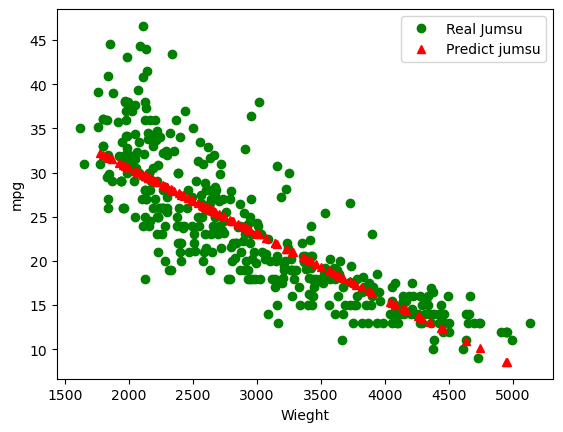

In [17]:
### 현재 데이터의 분포 확인
plt.plot(features,target,'go',label="Real Jumsu")
plt.plot(X_test,pre_mpg,'r^',label='Predict jumsu')
plt.xlabel('Wieght')
plt.ylabel('mpg')
plt.legend()
plt.show()

In [18]:
# 데이터 스코어
model.score(X_test,y_test)

0.6325244995073763

In [19]:
### 오차 계산 즉, 손실/비용 함수 확인
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score,root_mean_squared_error

In [20]:
pre_y = model.predict(X_test)

In [21]:
mse = mean_squared_error(y_test,pre_y)
rmse = root_mean_squared_error(y_test,pre_y)
mae = mean_absolute_error(y_test,pre_y)
r2 = r2_score(y_test,pre_y)

In [22]:
# 손실/비용 함수 값은 0에 가까울수록
# 결정계수(R-score) 값은 1에 가까울수록 성능 좋은 모델
print(f'mse : {mse}')
print(f'rmse : {rmse}')
print(f'mae : {mae}')
print(f'r2 : {r2}')

mse : 24.95850625127647
rmse : 4.995848901966158
mae : 3.6153114811756137
r2 : 0.6325244995073763
